<b>This dataset is concerned with the detected Earthquakes in the contiguous U.S , between the years 1995 and 2015. <br>
  Main questions answered : <br><b>
1) What are the most affected areas?<br>
2)Is there is a correlation between the magnitude and the depth of the earthquakes?<br>
3)What month usually has the most incidences and what year was the most dangerous? <br> 
 <br>
This is a SQLite database.<br>
Link: http://2016.padjo.org/tutorials/sqlite-data-starterpacks/#toc-m3-0-earthquakes-in-the-contiguous-u-s-1995-through-2015  

In [1]:
#importing sqlite3 to load the dataset ,pandas to manipulate the dataset ,plotly libraries to visualize the data. 
import pandas as pd
import sqlite3
import numpy as np
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
%matplotlib inline
import cufflinks as cf
cf.go_offline()

In [3]:
import plotly.io as pio
pio.renderers.default = "svg"

In [4]:
#establishing connection with the database 
con = sqlite3.connect('usgs-lower-us.sqlite')

In [5]:
#SQL query to select all columns from the table quakes
sq='''SELECT * FROM quakes'''

In [6]:
#read the table quakes
df=pd.read_sql(sq,con)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1995-01-01 12:43:19.340000,38.871000,-107.448000,1.000,3.00,ml,NaN,NaN,NaN,0.80,...,2014-11-07 00:57:03.767000,Colorado,rock burst,NaN,NaN,NaN,NaN,reviewed,us,gs$
1,1995-01-01 14:03:33.120000,39.367000,-123.239000,7.400,3.10,md,NaN,NaN,NaN,NaN,...,2014-11-07 00:57:03.784000,Northern California,earthquake,NaN,NaN,NaN,NaN,reviewed,nc,gm/
2,1995-01-01 14:59:36.630000,36.331167,-114.364833,3.739,3.60,ml,7.0,329.0,1.82900,0.19,...,2016-02-12 00:26:14.445000,"57km NE of Boulder City, Nevada",earthquake,3.860,31.61,NaN,0.0,reviewed,ci,ci
3,1995-01-02 04:10:13.010000,46.750333,-122.353500,18.067,3.30,md,91.0,28.0,0.09258,0.16,...,2016-07-23 16:22:09.820000,Washington,earthquake,0.022,0.07,0.040,11.0,reviewed,uw,uw
4,1995-01-02 10:23:55.160000,32.124500,-115.072500,5.980,3.89,ml,16.0,257.0,0.59490,0.32,...,2016-04-02 11:52:37.189000,"10km SW of Estacion Coahuila, B.C., MX",earthquake,3.760,31.61,0.172,6.0,reviewed,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16936,2015-12-30 11:22:48.500000,35.942800,-97.299700,7.690,3.20,ml,NaN,67.0,NaN,0.56,...,2016-03-18 01:13:08.040000,"4km W of Langston, Oklahoma",earthquake,1.400,7.50,NaN,NaN,reviewed,tul,tul
16937,2015-12-30 18:13:45.400000,35.664800,-97.401800,7.184,3.00,ml,NaN,63.0,NaN,0.75,...,2016-03-18 01:13:08.040000,"7km E of Edmond, Oklahoma",earthquake,2.000,7.00,NaN,NaN,reviewed,tul,tul
16938,2015-12-31 03:26:38.500000,36.832800,-97.767600,5.410,3.00,ml,NaN,51.0,NaN,0.47,...,2016-03-18 01:13:09.040000,"4km NW of Medford, Oklahoma",earthquake,1.600,5.10,NaN,NaN,reviewed,tul,tul
16939,2015-12-31 11:35:26.400000,36.612300,-98.805500,6.285,3.20,ml,NaN,127.0,NaN,0.55,...,2016-03-18 01:13:09.040000,"24km SSW of Alva, Oklahoma",earthquake,4.100,7.10,NaN,NaN,reviewed,tul,tul


In [7]:
#display the data frame columns
print(df.columns)

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


 <b>What are the most affected areas?

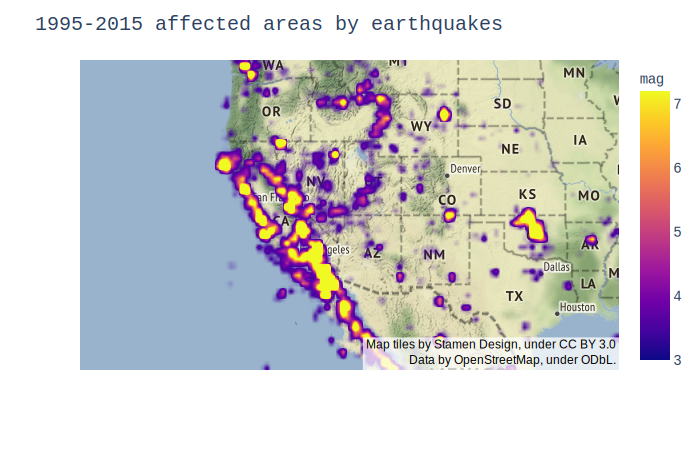

In [9]:
#using Plotly express to map the affected areas
fig=px.density_mapbox(df,lat='latitude',lon='longitude',z='mag',radius=5,mapbox_style="stamen-terrain",zoom=3)
fig.update_layout(title='1995-2015 affected areas by earthquakes',
                  geo_scope='usa',
                  font=dict(
                  family="Courier New, monospace",
                  size=14)
                 )
fig.show()

The southwest seems to be the most dangerous area when it comes to earthquakes.

<b>Is there is a correlation between the magnitude and the depth of the earthquakes?

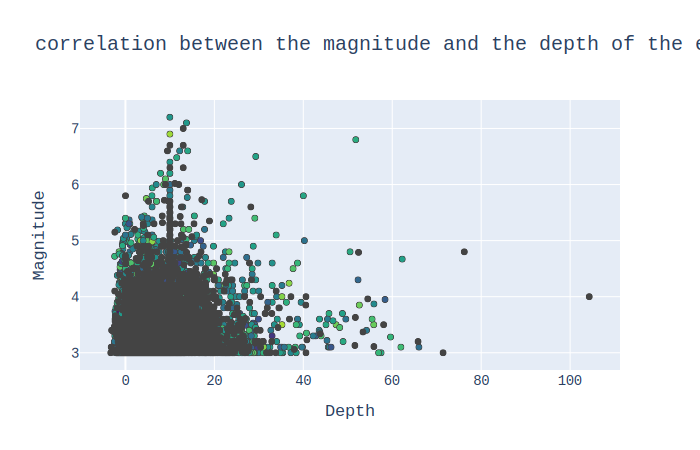

In [10]:
fig1 =go.Figure(go.Scattergl(
        x=df['depth'],
        y=df['mag'],
        mode='markers',
        text=df['place'],
        marker=dict(
        color=np.random.randn(10000),
        colorscale='Viridis',
         line_width=1   
        )
))
fig1.update_layout(
    title='correlation between the magnitude and the depth of the earthquakes',
    xaxis_title='Depth',
    yaxis_title='Magnitude',
    font=dict(
        family="Courier New, monospace",
        size=14)
)
fig1.show()

Most incidences occur in lower depths and the highest magnitudes are between 9 and 14.<br>
The highest recorded magnitude was 7.2 in 12Km SW of delta.<br> 
The highest depth was 104.3 in 97Km S of san felipe.

<b>What month usually has the most incidences and what year was the most dangerous?

In [11]:
#splitting the time column into mouth and year
df['month']=pd.DatetimeIndex(df['time']).month

In [12]:
df['year']=pd.DatetimeIndex(df['time']).year

In [13]:
#changing the display format of the month column from numeric to month name
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

In [14]:
#new column 'counter' as 1 for each incidence 
df['counter']=1

In [15]:
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,month,year,counter
0,1995-01-01 12:43:19.340000,38.871000,-107.448000,1.000,3.00,ml,NaN,NaN,NaN,0.80,...,NaN,NaN,NaN,NaN,reviewed,us,gs$,Jan,1995,1
1,1995-01-01 14:03:33.120000,39.367000,-123.239000,7.400,3.10,md,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reviewed,nc,gm/,Jan,1995,1
2,1995-01-01 14:59:36.630000,36.331167,-114.364833,3.739,3.60,ml,7.0,329.0,1.82900,0.19,...,3.860,31.61,NaN,0.0,reviewed,ci,ci,Jan,1995,1
3,1995-01-02 04:10:13.010000,46.750333,-122.353500,18.067,3.30,md,91.0,28.0,0.09258,0.16,...,0.022,0.07,0.040,11.0,reviewed,uw,uw,Jan,1995,1
4,1995-01-02 10:23:55.160000,32.124500,-115.072500,5.980,3.89,ml,16.0,257.0,0.59490,0.32,...,3.760,31.61,0.172,6.0,reviewed,ci,ci,Jan,1995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16936,2015-12-30 11:22:48.500000,35.942800,-97.299700,7.690,3.20,ml,NaN,67.0,NaN,0.56,...,1.400,7.50,NaN,NaN,reviewed,tul,tul,Dec,2015,1
16937,2015-12-30 18:13:45.400000,35.664800,-97.401800,7.184,3.00,ml,NaN,63.0,NaN,0.75,...,2.000,7.00,NaN,NaN,reviewed,tul,tul,Dec,2015,1
16938,2015-12-31 03:26:38.500000,36.832800,-97.767600,5.410,3.00,ml,NaN,51.0,NaN,0.47,...,1.600,5.10,NaN,NaN,reviewed,tul,tul,Dec,2015,1
16939,2015-12-31 11:35:26.400000,36.612300,-98.805500,6.285,3.20,ml,NaN,127.0,NaN,0.55,...,4.100,7.10,NaN,NaN,reviewed,tul,tul,Dec,2015,1


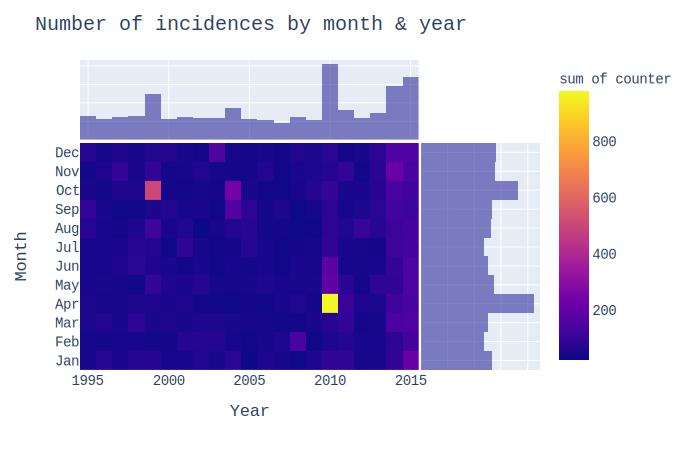

In [16]:
#heatmap by month & year of the number of incidences
fig3=px.density_heatmap(df,x='year',y='month',z='counter',marginal_x="histogram",marginal_y="histogram")
fig3.update_layout(
    title='Number of incidences by month & year',
    xaxis_title='Year',
    yaxis_title='Month',
    font=dict(
        family="Courier New, monospace",
        size=14)
)
fig3

April is the month with the most earthquake incidences in the years 1995 -2015 with a total of 2119.<br>
2010 was the most devastating year with a total of 2053 earthquakes.<br>
April 2010 was the worst month overall (979 incidences) 47% of the worst year total.<br>
October 1999 had an unusually high number of incidences(502). 